# ML tools and tricks

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Missing-data-imputation" data-toc-modified-id="Missing-data-imputation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Missing data imputation</a></span><ul class="toc-item"><li><span><a href="#Delete-rows-with-missing-values" data-toc-modified-id="Delete-rows-with-missing-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Delete rows with missing values</a></span></li><li><span><a href="#Delete-columns-with-many-missing-values" data-toc-modified-id="Delete-columns-with-many-missing-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Delete columns with many missing values</a></span></li><li><span><a href="#Impute-with-mean/median/mode" data-toc-modified-id="Impute-with-mean/median/mode-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Impute with mean/median/mode</a></span></li><li><span><a href="#Categorical-imputation" data-toc-modified-id="Categorical-imputation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Categorical imputation</a></span><ul class="toc-item"><li><span><a href="#New-category" data-toc-modified-id="New-category-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>New category</a></span></li><li><span><a href="#Top-category" data-toc-modified-id="Top-category-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Top category</a></span></li></ul></li><li><span><a href="#bfill-/-ffill" data-toc-modified-id="bfill-/-ffill-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><code>bfill</code> / <code>ffill</code></a></span></li><li><span><a href="#Not-imputing" data-toc-modified-id="Not-imputing-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Not imputing</a></span></li><li><span><a href="#Using-an-ML-model" data-toc-modified-id="Using-an-ML-model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Using an ML model</a></span></li></ul></li><li><span><a href="#Standarization" data-toc-modified-id="Standarization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Standarization</a></span><ul class="toc-item"><li><span><a href="#Taking-logs" data-toc-modified-id="Taking-logs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Taking logs</a></span></li><li><span><a href="#Standard-scaler" data-toc-modified-id="Standard-scaler-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Standard scaler</a></span></li></ul></li><li><span><a href="#Categorical-encodings" data-toc-modified-id="Categorical-encodings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical encodings</a></span><ul class="toc-item"><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>One hot encoding</a></span></li><li><span><a href="#Ordinal-encoding" data-toc-modified-id="Ordinal-encoding-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ordinal encoding</a></span></li><li><span><a href="#Target-encoding" data-toc-modified-id="Target-encoding-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Target encoding</a></span></li><li><span><a href="#More" data-toc-modified-id="More-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>More</a></span></li></ul></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stacking</a></span></li><li><span><a href="#Public-test-set-vs-private-test-set" data-toc-modified-id="Public-test-set-vs-private-test-set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Public test set vs private test set</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

 * Which tricks to perform and how to perform them are a matter of experience!  
 * There is no recipe for this. This is the challenging part of DS, no systematic solutions!!  
 * You always have your validation/test error to check if method A was better than method B. Go ahead and always try things!!

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

## Missing data imputation

In [4]:
df = pd.read_csv("../datasets/titanic.csv")

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sometimes our datasets have null values, we can handle them in different ways

### Delete rows with missing values

Depends on the use case  
Pros:
 * Robust model, only real data used  

Cons: 
 * We lose information
 * Works poorly if there are many missing values
 * We cannot do it on test set!

In [8]:
df.shape

(891, 12)

In [10]:
df.dropna().shape

(183, 12)

Bad...

### Delete columns with many missing values

We have to decide upon the *many* meaning

Pros:
 * Robust model, only real data used  
 * We can do it on the test set

Cons: 
 * We lose information
 * Works poorly if there are several columns with many missing values

In [11]:
df.shape

(891, 12)

Lets drop rows with missing values

Lets drop columns `Cabin`, then all rows with missing values

In [13]:
df.drop("Cabin", axis=1).dropna().shape

(712, 11)

Not that bad...

### Impute with mean/median/mode

In [17]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
df.Age.isna().sum()

177

In [18]:
df.Age.tail().to_frame()

,Age
886,27.0
887,19.0
888,NaN
889,26.0
890,32.0


In [19]:
df.Age.replace(np.NaN, df.Age.mean()).tail().to_frame()

,Age
886,27.000000
887,19.000000
888,29.699118
889,26.000000
890,32.000000


In [20]:
df.Age.replace(np.NaN, df.Age.median()).tail().to_frame()

,Age
886,27.0
887,19.0
888,28.0
889,26.0
890,32.0


### Categorical imputation

#### New category

In [22]:
df.shape

(891, 12)

In [23]:
df.Cabin.isna().sum()

687

Maybe there is a common reason for `NaN`, we can replace it by a new category

In [24]:
df.loc[df.Cabin.isna(), "Cabin"] = "other"

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,other,S


#### Top category

We can try and imput it with the top category

### `bfill` / `ffill`

You can fill with the inmediately upper entry value  
Useful for longitudinal behavior  
Similar to interpolation of time series

In [326]:
df = pd.read_csv("../datasets/titanic.csv")

In [28]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,other,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,other,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,other,Q


In [330]:
df.Cabin.fillna(method="bfill").head()

0     C85
1     C85
2    C123
3    C123
4     E46
Name: Cabin, dtype: object

### Not imputing

Some ML models know how to handle missing values, for example XGBoost

### Using an ML model

In [331]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Build a model that predicts Age using other variables!:
 * Train your algorithm with entries with non-null Age
 * Predict on null ages

## Standarization

Some models do not care about data magnitude, only about data ranking:
 * Decision trees and similar

Some models care about data magnitude:
 * Linear regression with regularization
 * KNN neighbors (euclidean distance between points)
 
In this case, variables should have a similar distribution. This can be achieved by:
 * Taking logarithms on some variables (watch out on interpretability!)
 * Scaling the variables

### Taking logs

Baseball players properties

In [29]:
df = pd.read_csv("../datasets/baseball.csv")

<AxesSubplot:xlabel='CHmRun', ylabel='Count'>

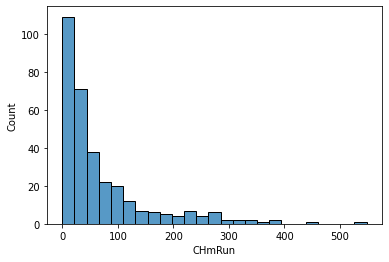

In [31]:
sns.histplot(df.CHmRun)

<AxesSubplot:xlabel='CHmRun', ylabel='Count'>

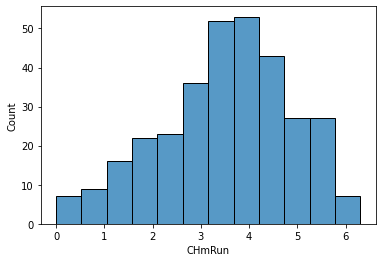

In [32]:
sns.histplot(np.log1p(df.CHmRun))

Nicer!

### Standard scaler

Baseball players properties

In [33]:
df = pd.read_csv("../datasets/baseball.csv").iloc[:, :5]

In [34]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI
0,293,66,1,30,29
1,315,81,7,24,38
2,479,130,18,66,72
3,496,141,20,65,78
4,321,87,10,39,42


In [36]:
df.mean()

AtBat    380.928571
Hits     101.024845
HmRun     10.770186
Runs      50.909938
RBI       48.027950
dtype: float64

In [37]:
df.std()

AtBat    153.404981
Hits      46.454741
HmRun      8.709037
Runs      26.024095
RBI       26.166895
dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(df)

StandardScaler()

In [41]:
df2 = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [42]:
df2.head()

,AtBat,Hits,HmRun,Runs,RBI
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827
2,0.640293,0.624699,0.831443,0.580752,0.917547
3,0.751283,0.861858,1.061447,0.542266,1.147201
4,-0.391264,-0.302373,-0.088573,-0.458363,-0.230724


In [43]:
df2.mean()

AtBat   -8.826618e-17
Hits    -7.378501e-17
HmRun    1.437773e-16
Runs     8.688702e-17
RBI      6.809598e-18
dtype: float64

In [44]:
df2.std()

AtBat    1.001556
Hits     1.001556
HmRun    1.001556
Runs     1.001556
RBI      1.001556
dtype: float64

## Categorical encodings

 * Most ML models only accept numerical variables, so...
 * You need to turn categorical variables into numerical ones
 * There are several ways of doing this

There are two types of categorical variables:
 * Nominal variables (order does not matter):
  - female, male
  - red, yellow, pink, blue
  - Singapore, Japan, USA, India, Korea
  - cow, dog, cat, snake
 * Ordinal variables (order matters):
  - High, Medium, Low
  - Excellent, Okay, Bad
  - Strongly agree, Agree, Neutral, Disagree, and Strongly Disagree

### One hot encoding

Useful for features which:
 * are nominal, this is, have no clear ordering between categories (male, female)
 * have not many different categories

In [45]:
df = pd.read_csv("../datasets/titanic.csv")[["Sex", "Cabin", "Embarked"]].dropna()

In [46]:
df.head()

,Sex,Cabin,Embarked
1,female,C85,C
3,female,C123,S
6,male,E46,S
10,female,G6,S
11,female,C103,S


You can use `sklearn.preprocessing.OneHotEncoder`

I prefer `pd.get_dummies`

In [47]:
pd.get_dummies(df, columns=["Sex", "Embarked"]).head()

,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,C85,1,0,1,0,0
3,C123,1,0,0,0,1
6,E46,0,1,0,0,1
10,G6,1,0,0,0,1
11,C103,1,0,0,0,1


Even better: redundant information can be non-created using `drop_first=True`

In [49]:
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()

,Cabin,Sex_male,Embarked_Q,Embarked_S
1,C85,0,0,0
3,C123,0,0,1
6,E46,1,0,1
10,G6,0,0,1
11,C103,0,0,1


Problem with features with many categories: soooo many columns created, not good

In [50]:
pd.get_dummies(df, columns=["Sex", "Embarked", "Cabin"], drop_first=True).head()

,Sex_male,Embarked_Q,Embarked_S,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ordinal encoding

Useful for:
 * Ordinal variables (order makes sense)

When **not** to use it

In [51]:
df.head()

,Sex,Cabin,Embarked
1,female,C85,C
3,female,C123,S
6,male,E46,S
10,female,G6,S
11,female,C103,S


In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
enc = OrdinalEncoder()

In [54]:
enc.fit(df[["Embarked"]])

OrdinalEncoder()

In [55]:
enc.transform(df[["Embarked"]])

array([[0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],

`C` ain't bigger than `Q` bigger than `S`

When to use it

In [56]:
df = pd.Series(["tall", "medium", "tall", "low", "tall", "low", "medium"], name="height").to_frame()

In [57]:
df

,height
0,tall
1,medium
2,tall
3,low
4,tall
5,low
6,medium


I prefer using `pd.map`

In [58]:
height_map = {
    "tall": 3,
    "medium": 2,
    "low": 1
}

In [59]:
df["height_num"] = df.height.map(height_map)

In [60]:
df.head()

,height,height_num
0,tall,3
1,medium,2
2,tall,3
3,low,1
4,tall,3


### Target encoding

Useful for features with a biiig number of categories

We change the category by the **mean of the target** for all elements of that category  

In [61]:
df = pd.read_csv("../datasets/house_data.csv")

In [62]:
df.head()

,bedrooms,floors,zipcode,sqft_living,price
0,3,1.0,98178,1180,221.9
1,3,2.0,98125,2570,538.0
2,2,1.0,98028,770,180.0
3,4,1.0,98136,1960,604.0
4,3,1.0,98074,1680,510.0


In [70]:
df.shape

(21613, 5)

In [71]:
df.zipcode.nunique()

70

In [72]:
price_per_zipcode = df.groupby("zipcode").price.mean()

In [73]:
price_per_zipcode.head()

zipcode
98001     280.804691
98002     234.284035
98003     294.111279
98004    1355.927082
98005     810.164875
Name: price, dtype: float64

In [74]:
df["zip_price"] = df["zipcode"].map(price_per_zipcode)

In [75]:
df.head()

,bedrooms,floors,zipcode,sqft_living,price,zip_price
0,3,1.0,98178,1180,221.9,310.612756
1,3,2.0,98125,2570,538.0,469.455771
2,2,1.0,98028,770,180.0,462.480035
3,4,1.0,98136,1960,604.0,551.688673
4,3,1.0,98074,1680,510.0,685.605776


In [284]:
df = df.drop("zipcode", axis=1)

In [285]:
df.head()

,bedrooms,floors,sqft_living,price,zip_price
0,3,1.0,1180,221.9,310.612756
1,3,2.0,2570,538.0,469.455771
2,2,1.0,770,180.0,462.480035
3,4,1.0,1960,604.0,551.688673
4,3,1.0,1680,510.0,685.605776


### More

This is a very interesting topic. [Medium article](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)

## Stacking

Why not use several models and predict a weighed mean of the predictions?

In [76]:
df = pd.read_csv("../datasets/baseball.csv").dropna()

In [77]:
df.shape

(263, 20)

In [78]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [86]:
df = pd.get_dummies(df, drop_first=False)

In [87]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,1,0,0,1,1,0


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Salary", axis=1),
    df.Salary, 
    test_size=0.2
)

In [90]:
X_train.shape

(210, 22)

In [91]:
X_test.shape

(53, 22)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(
    X_train,
    y_train
)

LinearRegression()

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(
    X_train,
    y_train
)

RandomForestRegressor()

In [98]:
results = pd.DataFrame({"real": y_test, "linear_pred": lr.predict(X_test), "forest_pred": rf.predict(X_test)})

In [99]:
results.head()

,real,linear_pred,forest_pred
213,100.0,454.525176,91.80000
248,1670.0,846.158196,1224.88039
115,900.0,605.688156,1194.58018
161,657.0,1052.183456,716.76784
315,165.0,805.530263,161.41000


In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
mean_squared_error(results.real, results.linear_pred)

93715.05246278562

In [103]:
mean_squared_error(results.real, results.forest_pred)

45355.39690924813

In [107]:
results["mean_prediction"] = (results.linear_pred * 0.1 + results.forest_pred * 0.9)

In [108]:
results.head()

,real,linear_pred,forest_pred,mean_prediction
213,100.0,454.525176,91.80000,128.072518
248,1670.0,846.158196,1224.88039,1187.008171
115,900.0,605.688156,1194.58018,1135.690978
161,657.0,1052.183456,716.76784,750.309402
315,165.0,805.530263,161.41000,225.822026


In [109]:
mean_squared_error(results.real, results.mean_prediction)

43006.12958789216

## Public test set vs private test set

In competitions there is a:
 * Public leaderboard (shown along the competition): 
  - our submissions are evaluated only on a **fraction** of the test set
  - the score is orientative
 * Private leaderboard (shown by the end of the competition):
  - our submissions are evaluated on the remaining fraction of the test set
  - the final score for Prizes is this one

This prevents us from doing many submissions and cherry-picking our changes:

[Titanic submissions URL](https://www.kaggle.com/c/titanic/submit)

In [111]:
df = pd.read_csv("../datasets/test_titanic.csv")

In [112]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
df["Survived"] = np.random.randint(0, 2, df.shape[0])

In [114]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [115]:
df[["PassengerId", "Survived"]].to_csv("../datasets/submission_titanic.csv", index=False)

Accuracy submission: 0.50956

In [120]:
df.shape

(418, 12)

In [117]:
df.loc[0, "Survived"] = 1

In [118]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [119]:
df[["PassengerId", "Survived"]].to_csv("../datasets/submission_titanic2.csv", index=False)

Accuracy submission: 0.50717

Less accuracy, implying the original `0` was correct

This method *should* not work to win a competition, that is why Public/Private test sets exists, and competitors do not know which is which!

## Summary

 * Internalize the dataset
 * Explore it thoroughly
 * Try different things, the validation paradigm lets you see what things work better!!!

 * Missing value imputation can be done in different ways. Tradeoffs exist
 * Categorical features must be transformed. Find the best way!
 * Standarization is important if the model is magnitude-dependent, but XGBoost is not!!
 * Mean models work better than their contributors sometimes

 * Feature engineer your features: 
  - transform your variables
  - make sums, products, quotients between them...
  - strings can give very cool information if treated correctly (for example, extracting Mr, Ms, Mrs, Captain... from Titanic `Name`...)